### K-Nearest Neighbors Algorithm
K-En Yakın Komşu (KNN) algoritması, makine öğrenmesinde sınıflandırma ve regresyon problemleri için kullanılan basit bir algoritmadır. KNN, temel bir örnek tabanlı (instance-based) veya örnek temelli (instance-based) bir öğrenme yöntemidir. <br>
![knn.png](https://1.bp.blogspot.com/-4jnFru8nLv8/XrlJDzLlmLI/AAAAAAAAEx8/h46REcOX7mM1s-fSD6cMfTaEDoOMwhQDACLcBGAsYHQ/s1600/1.png) <br><br>
KNN (K-En Yakın Komşu) algoritması, tahmin yapmak için aşağıdaki adımları izler:<br>

**Veri Kümesi:** İlk adımda, eğitim veri kümesi olarak adlandırılan bir veri kümesi belirlenir. Bu veri kümesi, özelliklerin (bağımsız değişkenlerin) ve hedef değişkenlerin (sınıfların veya çıktıların) birleşimini içerir.<br>

**Örnek Uzayı:** Veri kümesi, bir örnek uzayında temsil edilir. Örnek uzayı, her bir veri noktasını bir nokta veya vektör olarak düşünür. Her bir nokta, veri noktasının özelliklerine karşılık gelir.<br>

**Komşuluk Belirleme:** Tahmin yapmak istediğimiz bir nokta veya veri noktası verildiğinde, KNN algoritması bu noktanın çevresindeki en yakın komşu noktaları belirler. Komşuluk belirleme, genellikle öklidyen mesafe veya Manhattan mesafesi gibi bir mesafe ölçütü kullanılarak yapılır. Bu, tahmin etmek istediğimiz noktanın çevresindeki diğer noktaların mesafelerini hesaplamak ve en yakın K noktayı seçmek anlamına gelir.<br>

**Sınıflandırma veya Regresyon:** K belirli bir sayıdaki en yakın komşuyu seçtikten sonra, KNN algoritması bu komşuların sınıflarına veya çıktı değerlerine bakar. Sınıflandırma problemleri için, tahmin etmek istediğimiz noktanın sınıfını belirlemek için çoğunluk sınıfını veya ağırlıklı sınıf oylamasını kullanırız. Regresyon problemleri için, tahmin etmek istediğimiz noktanın çıktısını belirlemek için komşuların çıktı değerlerini kullanırız. Örneğin, regresyon problemleri için en yakın komşuların çıktı değerlerinin ortalaması alınabilir.<br><br>
Şimdi diyabet ve diyabeti etkileyebilecek olası verilerden oluşan veri setimizde bir knn modeli oluşturacağız: <br>
Kullanacağımız veri setine ulaşmak için: [Veri Seti Link](https://www.kaggle.com/code/mathchi/diagnostic-a-patient-has-diabetes/input) <br>
Öncelikle gerekli kütüphanelerimizi import edelim:

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn import preprocessing, metrics

In [2]:
df = pd.read_csv('data/diabetes.csv')
df

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


Öncelikle verilerimizin özet bilgilerini görüntüleyelim.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


Verilerimizin istatistiksel özet bilgilerini görüntüleyelim.

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Eksik verilerimiz var mı diye kontrol edelim:

In [5]:
df.isnull().sum().sort_values(ascending = False)

Outcome                     0
Age                         0
DiabetesPedigreeFunction    0
BMI                         0
Insulin                     0
SkinThickness               0
BloodPressure               0
Glucose                     0
Pregnancies                 0
dtype: int64

Verimizde eksik veri yok fakat Glucose, BloodPressure, SkinThickness, Insulin, BMI kolonlarında '0' verisi olması anlamsızdır
Eğer varsa bunlar eksik veri olarak değerlendirmelidir. Çünkü bir insanın bu değerleri asla 0 olmaz. 
Bu sütunlardaki '0'lı verileri "nan" değere çevirip kontrol edelim ve uygun bir strateji ile dolduralım:

In [6]:
df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']] = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].replace(0,np.NaN)
df.isnull().sum().sort_values(ascending = False)

Insulin                     374
SkinThickness               227
BloodPressure                35
BMI                          11
Glucose                       5
Outcome                       0
Age                           0
DiabetesPedigreeFunction      0
Pregnancies                   0
dtype: int64

Boş verileri doldururken, doldurulan değerlerin orijinal veri dağılımını bozmaması ve analiz sonuçlarını 
yanıltıcı hale getirmemesi önemlidir.Bu yüzden öncelikle verilerin dağılımını histogram grafikleri ile inceleyeceğiz:

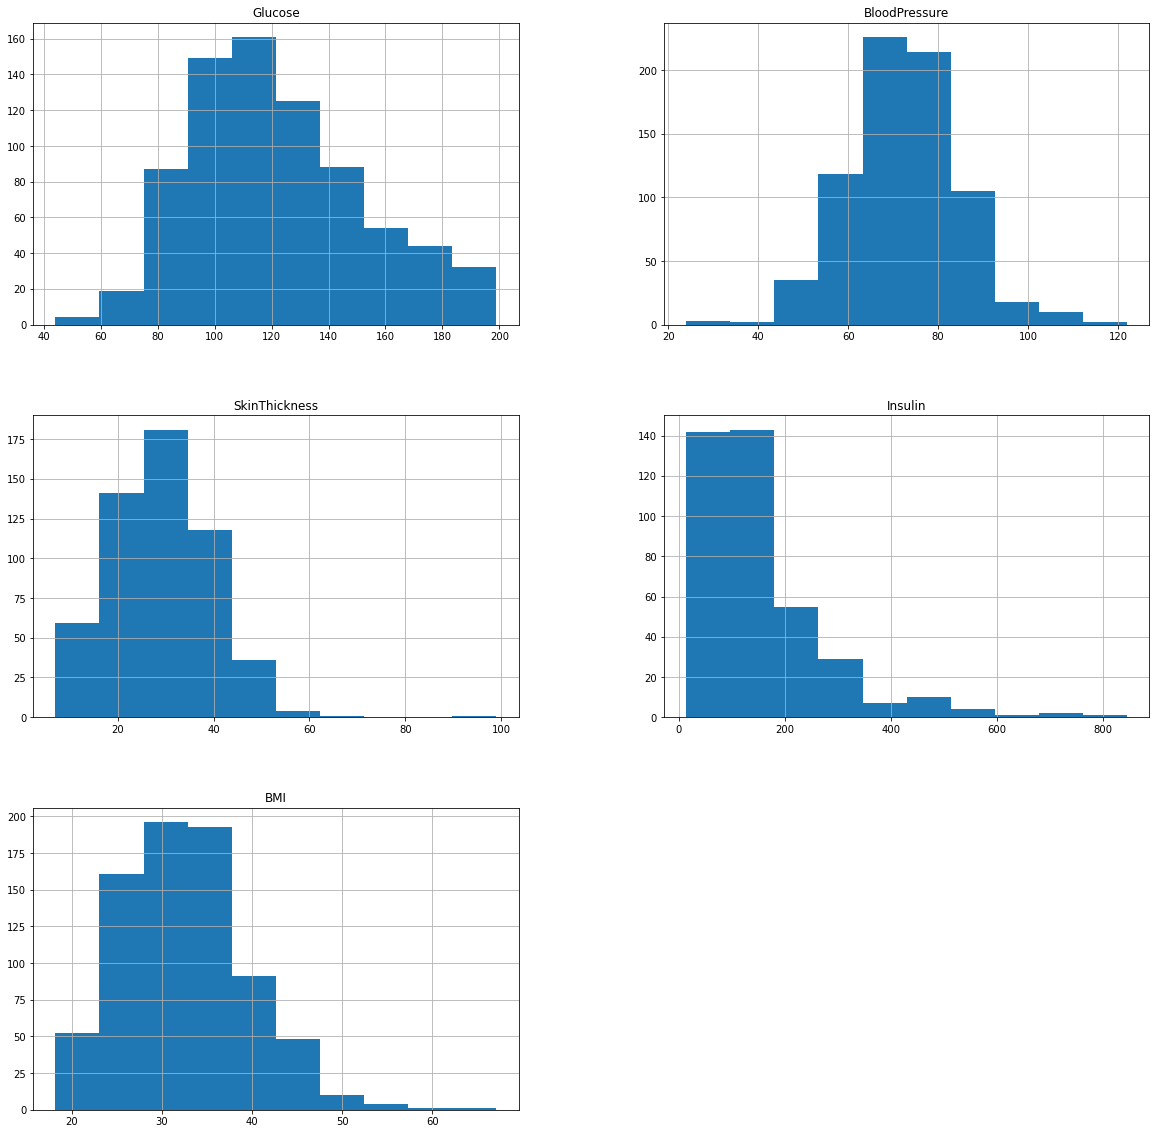

In [7]:
p = df[['Glucose','BloodPressure','SkinThickness','Insulin','BMI']].hist(figsize = (20,20))

Histogram grafiklerinden de görebileceğimiz gibi, 'Glucose' ve 'BloodPressure' sütunlarındaki veriler normal dağılımı takip ettiği için buradaki boş verileri sütun ortalaması ile,
sağa ve sola yatık verilerin olduğu sütunlarda ise boş verileri medyan değeri ile doldurmamız uygun olacaktır:

In [8]:
df['Glucose'].fillna(df['Glucose'].mean(), inplace = True)
df['BloodPressure'].fillna(df['BloodPressure'].mean(), inplace = True)
df['SkinThickness'].fillna(df['SkinThickness'].median(), inplace = True)
df['Insulin'].fillna(df['Insulin'].median(), inplace = True)
df['BMI'].fillna(df['BMI'].median(), inplace = True)

In [9]:
df.isnull().sum().sort_values(ascending = False)

Outcome                     0
Age                         0
DiabetesPedigreeFunction    0
BMI                         0
Insulin                     0
SkinThickness               0
BloodPressure               0
Glucose                     0
Pregnancies                 0
dtype: int64

Verilerimizi analize hazırlamış olduk. <br>
Son olarak verimizdeki çıktı niteliğinde olan outcome sütununda ( 1: diyabet var 2: diyabet yok ), iki kategori de eşit temsil edilmiş mi diye kontrol edelim. <br>
Her durumu eşit temsil edilmesi modelimizi eğittikten sonra ondan bekleyeceğimiz sonuçları doğru vermesinde kritik bir noktadır.

0    500
1    268
Name: Outcome, dtype: int64


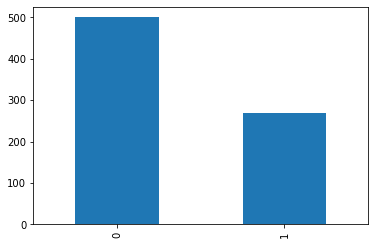

In [10]:
print(df.Outcome.value_counts())
p=df.Outcome.value_counts().plot(kind="bar")

**Yorum:** Outcome sütununda iki kategoriyi de eşit temsil edecek miktarda veri yok. Örneğimize devam edeceğiz fakat gerçek hayatta yapılan analizlerde daha fazla veri bulunması sağlanmalıdır.

Algoritma modelimizi kurmadan önce sütunlarımız arasındaki ilişkiye dair biraz daha bilgi sahibi olabilmek için **Pearson's Correlation Coefficient (Pearson Kolerasyon katsayısını)** kullanacağız. <br>
İki sütunun korelasyon katsayısı birbirlerindeki değişimlerden ne kadar etkilendiklerini gösteren bir değerdir.<br>
En etkileşimli oldukları durumda 1 hiç etkileşimli olmadıkları durumda ise 0'dır. <br>
Şimdi **seaborn kütüphanesi** kullanarak tüm sütunların birbirleri ile hesaplanan korelasyon katsayı değerlerini **heatmap grafiğinde** gösterelim.<br>

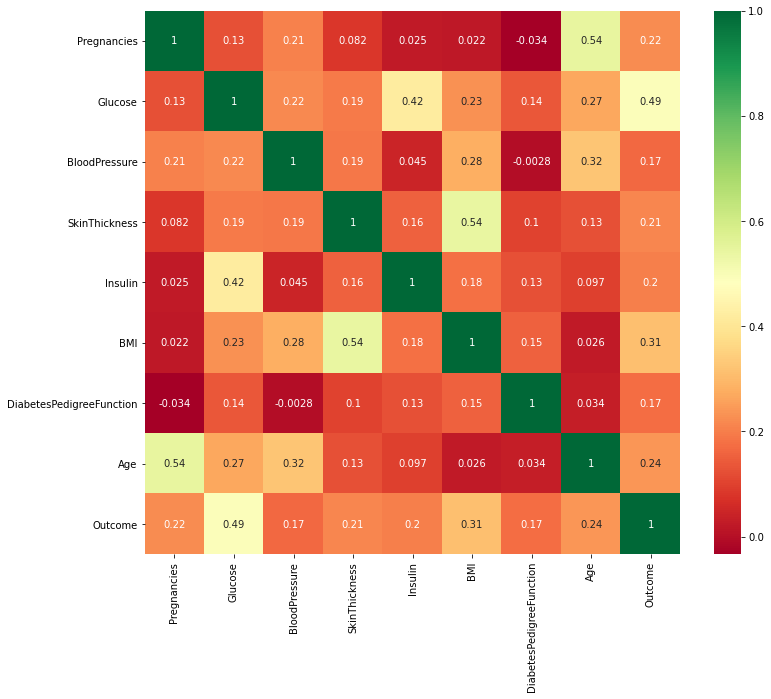

In [13]:
import seaborn as sns
plt.figure(figsize=(12,10))  
p=sns.heatmap(df.corr(), annot=True,cmap ='RdYlGn')  

**Grafik yorumu:** Bu grafikte doğal olarak köşegen değerleri 1 çıkacaktır. Her sütunun kendi ile etkileşimi 1 olduğu için. Çıktımız 'outcome' sütunu olduğuna göre en alt satırda, tüm diğer sütunların onunla oluşturduğu korelasyon katsayısına bakmak mantıklı olacaktır. <br>
Grafiğe göre bir insanda diyabet olup olmaması, sadece ikili ilişkiler dikkate alındığında en çok insanın 'glucose' değeri ile ilişkilidir.

KNN gibi noktalar arası mesafe temelli algoritmalarda daha başarılı sonuçlar almak için öncelikle veriler **standardize** edilir.
Öncelikle sütunlarda tutulan verilere ndarray tipinde ihtiyacımız var. Çünkü ileride uygulayacağımız fonksiyonlar bu veri tipinde parametre kabul ediyor.

In [17]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

In [24]:
X = df[[ 'Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age']].values
X

array([[  6.   , 148.   ,  72.   , ...,  33.6  ,   0.627,  50.   ],
       [  1.   ,  85.   ,  66.   , ...,  26.6  ,   0.351,  31.   ],
       [  8.   , 183.   ,  64.   , ...,  23.3  ,   0.672,  32.   ],
       ...,
       [  5.   , 121.   ,  72.   , ...,  26.2  ,   0.245,  30.   ],
       [  1.   , 126.   ,  60.   , ...,  30.1  ,   0.349,  47.   ],
       [  1.   ,  93.   ,  70.   , ...,  30.4  ,   0.315,  23.   ]])

In [25]:
y = df['Outcome'].values
y

array([1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1,
       1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,

Şimdi standardize etme işlemine başlayabiliriz:

In [26]:
X = preprocessing.StandardScaler().fit(X).transform(X.astype(float))
X

array([[ 0.63994726,  0.86510807, -0.03351824, ...,  0.16661938,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.20616153, -0.52985903, ..., -0.85219976,
        -0.36506078, -0.19067191],
       [ 1.23388019,  2.0158134 , -0.69530596, ..., -1.33250021,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 , -0.0225789 , -0.03351824, ..., -0.910418  ,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.14180757, -1.02619983, ..., -0.34279019,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.94314317, -0.19896517, ..., -0.29912651,
        -0.47378505, -0.87137393]])

Şimdi modelimizi eğitmek ve test etmek için veri setimizi %80'e %20 olacak şekilde ikiye ayırıyoruz:<br> <br>
Özellikle dengesiz sınıf dağılımına sahip veri kümelerinde kullanıldığında, **stratify parametresi** önemlidir. Bizim veri setimizde diyabet olan örnekler (1) olmayan örneklerin (0) neredeyse yarısı kadardı. Bu dengesizliğin etkisini kuracağımız modelde azaltmak için verileri eğitim ve test diye ayırırken stratify parametresini kullanıyoruz. <br>
Eğer hedef değişkenin sınıfları dengesiz ise (bazı sınıfların daha az örneği varsa), stratify=y parametresi kullanılmazsa 
eğitim ve test kümeleri arasında **sınıf dengesizliği** olabilir. Bu durumda, modelin sınıf tahminlerinde yanlılık oluşabilir. Örneğin bu örnek için stratify parametresi kullanmasaydık eğitim verilerine daha çok diyabet olmayan (0) kişilerin verileri gidebilirdi ve modelimizi yanlış eğitmiş oluruduk. <br><br>
Şimdi ise test ve eğitim veri setlerinde ana verideki diyabeti olan/olmayan oranı korunacak.

In [36]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42, stratify=y)

KNN algoritmasında kritik noktalardan biri **en yakın kaç (k) komşuya bakılacağını** bulmaktır. Yeni gelen bir verinin sınıfına buna göre karar verilir. <br>
Optimum k değerini bulmak için 1'den 14'e kadar olan sayıları deneyelim ve en yüksek score'u veren k değerini kullanalım:

In [37]:
test_scores = []

for i in range(1,15):

    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(X_train,y_train)
    y_predict = knn.predict(X_test)
    
    test_scores.append(metrics.accuracy_score(y_test, y_predict))

max_test_score = max(test_scores)  # En yüksek test skorunu bul
test_scores_ind = [i+1 for i, score in enumerate(test_scores) if score == max_test_score]  # En yüksek test skoruna sahip k değerlerini bul

print(f"Max test score: {max_test_score*100:.2f}%")  # En yüksek test skorunu yazdır
print("Corresponding k values:", test_scores_ind)  # Karşılık gelen k değerlerini yazdır
    


Max test score: 75.32%
Corresponding k values: [5]


Bulduğumuz sonuçları görselleştirelim:

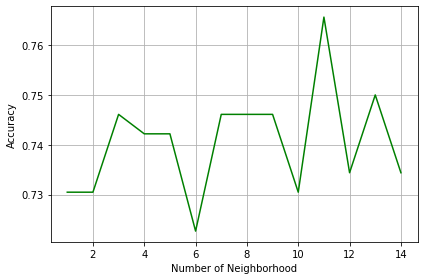

In [34]:
plt.plot(range(1, 15), test_scores, 'green')


plt.ylabel('Accuracy')
plt.xlabel('Number of Neighborhood')
plt.grid(True)
plt.tight_layout()
plt.show()

En iyi bulduğumuz k değeri ile modelimizi kuralım:

In [35]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train,y_train)
y_predict = knn.predict(X_test)
y_predict

array([0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       1, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1,
       0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0], dtype=int64)